In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
# Importing Classifier Modules
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
# We do this to ignore several specific Pandas warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('C:/Users/UL494YB/OneDrive - EY/Desktop/Grad School/Data Mining Principle/session 5/Assignment 3/Assignment_3/Loan_Prediction/Data for Cleaning & Modeling.csv')
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32
0,11.89%,54734.0,80364.0,"$25,000","$25,000","$19,080",36 months,B,B4,NaN,...,Feb-94,0.0,NaN,NaN,10.0,0.0,28854.0,52.10%,42.0,f
1,10.71%,55742.0,114426.0,"$7,000","$7,000",$673,36 months,B,B5,CNN,...,Oct-00,0.0,NaN,NaN,7.0,0.0,33623.0,76.70%,7.0,f
2,16.99%,57167.0,137225.0,"$25,000","$25,000","$24,725",36 months,D,D3,Web Programmer,...,Jun-00,0.0,41.0,NaN,10.0,0.0,19878.0,66.30%,17.0,f
3,13.11%,57245.0,138150.0,"$1,200","$1,200","$1,200",36 months,C,C2,city of beaumont texas,...,Jan-85,0.0,64.0,NaN,5.0,0.0,2584.0,40.40%,31.0,f
4,13.57%,57416.0,139635.0,"$10,800","$10,800","$10,692",36 months,C,C3,State Farm Insurance,...,Dec-96,1.0,58.0,NaN,14.0,0.0,3511.0,25.60%,40.0,f


Data Cleaning/Prepping - Training Data

In [3]:
#based on my analysis, I decided to use the following features for my training data
df_reduced=df[['X1','X4','X5','X7','X8','X11',
        'X13', 'X14','X17', 'X21',
       'X22','X24', 'X27', 'X28', 'X29', 'X30', 'X31',
       'X32']]
df_reduced.head(5)

,X1,X4,X5,X7,X8,X11,X13,X14,X17,X21,X22,X24,X27,X28,X29,X30,X31,X32
0,11.89%,"$25,000","$25,000",36 months,B,< 1 year,85000.0,VERIFIED - income,debt_consolidation,19.48,0.0,0.0,10.0,0.0,28854.0,52.10%,42.0,f
1,10.71%,"$7,000","$7,000",36 months,B,< 1 year,65000.0,not verified,credit_card,14.29,0.0,0.0,7.0,0.0,33623.0,76.70%,7.0,f
2,16.99%,"$25,000","$25,000",36 months,D,1 year,70000.0,VERIFIED - income,debt_consolidation,10.50,0.0,0.0,10.0,0.0,19878.0,66.30%,17.0,f
3,13.11%,"$1,200","$1,200",36 months,C,10+ years,54000.0,not verified,debt_consolidation,5.47,0.0,0.0,5.0,0.0,2584.0,40.40%,31.0,f
4,13.57%,"$10,800","$10,800",36 months,C,6 years,32000.0,not verified,debt_consolidation,11.63,0.0,1.0,14.0,0.0,3511.0,25.60%,40.0,f


In [4]:
print(len(df_reduced['X1'].unique()))
df_reduced['X1'].value_counts()

483


10.99%    11082
12.99%     9951
15.61%     9869
8.90%      9656
7.90%      8569
          ...  
20.52%        1
14.28%        1
16.71%        1
17.44%        1
22.64%        1
Name: X1, Length: 482, dtype: int64

In [5]:
df_reduced['X1']=df_reduced['X1'].replace({'%':''}, regex = True)
df_reduced['X1']=df_reduced['X1'].astype(float)

In [6]:
df_reduced['X1'].describe()
#getting summary stats on my target variable

count    338990.000000
mean         13.946271
std           4.377951
min           5.420000
25%          10.990000
50%          13.680000
75%          16.780000
max          26.060000
Name: X1, dtype: float64

In [7]:
df_reduced['X4']=df_reduced['X4'].replace({'\$':''}, regex = True)
df_reduced['X4']=df_reduced['X4'].replace({',':''}, regex = True)
df_reduced['X4']=df_reduced['X4'].astype(float)

In [8]:
df_reduced['X5']=df_reduced['X5'].replace({'\$':''}, regex = True)
df_reduced['X5']=df_reduced['X5'].replace({',':''}, regex = True)
df_reduced['X5']=df_reduced['X5'].astype(float)

In [9]:
df_reduced['X7']=df_reduced['X7'].str.slice(1,3)
df_reduced['X7'].value_counts()

36    292369
60    107630
Name: X7, dtype: int64

In [10]:
d2 = {'36': 1, '60': 0}
df_reduced['X7']=df_reduced['X7'].map(d2)

In [11]:
d1 = {'A': 1, 'B': 2,'C':3, 'D': 4, 'E': 5,'F':6,'G':7}
df_reduced['X8']=df_reduced['X8'].map(d1)

In [12]:
df_reduced['X11'] = df_reduced['X11'].str.split(expand=True)[0]
df_reduced.replace({'X11': '<'}, 0, inplace=True)
df_reduced.replace({'X11': '10+'}, 10, inplace=True)

In [13]:
df_reduced['X11'].value_counts()

10    128060
2      35427
3      31428
0      30607
5      27277
1      25321
4      24035
6      23062
7      22837
8      19139
9      15269
Name: X11, dtype: int64

In [14]:
df_reduced['X11'].unique()

array([0, '1', 10, '6', '9', '3', '5', '2', '4', '8', '7', nan],
      dtype=object)

In [15]:
df_reduced['X11'].isnull().sum()

17538

In [16]:
d = {'VERIFIED - income': 1, 'VERIFIED - income source': 1,'not verified':0}
df_reduced['X14']=df_reduced['X14'].map(d)

In [17]:
print(len(df_reduced['X17'].unique()))
print(df_reduced['X17'].isnull().sum())
temp = df_reduced['X17'].value_counts().to_dict()
for key, num in zip(temp,range(1,len(temp)+1)):
    temp[key] = num
temp

15
1


{'debt_consolidation': 1,
 'credit_card': 2,
 'home_improvement': 3,
 'other': 4,
 'major_purchase': 5,
 'small_business': 6,
 'car': 7,
 'medical': 8,
 'moving': 9,
 'wedding': 10,
 'vacation': 11,
 'house': 12,
 'educational': 13,
 'renewable_energy': 14}

In [18]:
df_reduced['X17']=df_reduced['X17'].map(temp)

In [19]:
df_reduced['X30']=df_reduced['X30'].replace({'%':''}, regex = True)
df_reduced['X30']=df_reduced['X30'].astype(float)

In [20]:
df_reduced['X30']=df_reduced['X30'].mask(df_reduced['X30']<=30.,1)
df_reduced['X30']=df_reduced['X30'].mask(df_reduced['X30']>30,2)
df_reduced['X30']=df_reduced['X30'].mask(df_reduced['X30']>50,3)

In [21]:
d2 = {'w': 1, 'f': 0}
df_reduced['X32']=df_reduced['X32'].map(d2)

In [22]:
df_reduced.dtypes

X1     float64
X4     float64
X5     float64
X7     float64
X8     float64
X11     object
X13    float64
X14    float64
X17    float64
X21    float64
X22    float64
X24    float64
X27    float64
X28    float64
X29    float64
X30    float64
X31    float64
X32    float64
dtype: object

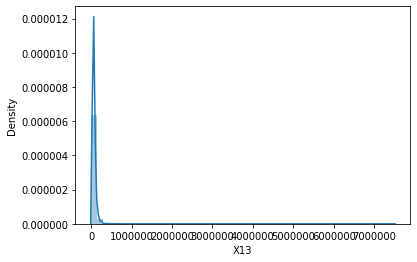

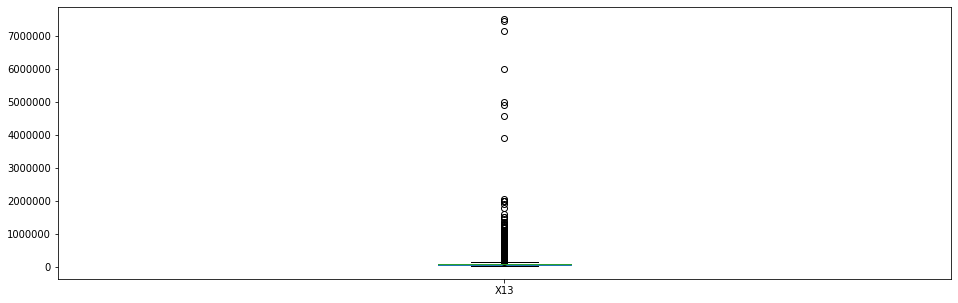

In [23]:
#Outliner Treatment
sns.distplot(df_reduced['X13'])
plt.show()
df_reduced['X13'].plot.box(figsize=(16,5))
plt.show()

In [24]:
print(df_reduced.shape)
df_reduced.isnull().sum()

(400000, 18)


X1     61010
X4         1
X5         1
X7         1
X8     61270
X11    17538
X13    61028
X14        1
X17        1
X21        1
X22        1
X24        1
X27        1
X28        1
X29        1
X30      267
X31        1
X32        1
dtype: int64

In [25]:
# fill using the mean of the feature.
df_reduced['X30'].fillna(df_reduced['X30'].mean(),inplace=True)

In [26]:
dt1=df_reduced['X11'].dropna()
dt1=dt1.astype(float)
dt1.mean()

5.9936621154519925

In [27]:
# fill using the mean of the feature.
df_reduced['X11'].fillna(dt1.mean(),inplace=True)
df_reduced['X11']=df_reduced['X11'].astype(float)

In [28]:
#Applied a more conservative approach to drop the rest of nulls due to the total numbers of null from the total population. 
df_reduced.dropna(inplace=True)

In [29]:
df_reduced.columns

Index(['X1', 'X4', 'X5', 'X7', 'X8', 'X11', 'X13', 'X14', 'X17', 'X21', 'X22',
       'X24', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32'],
      dtype='object')

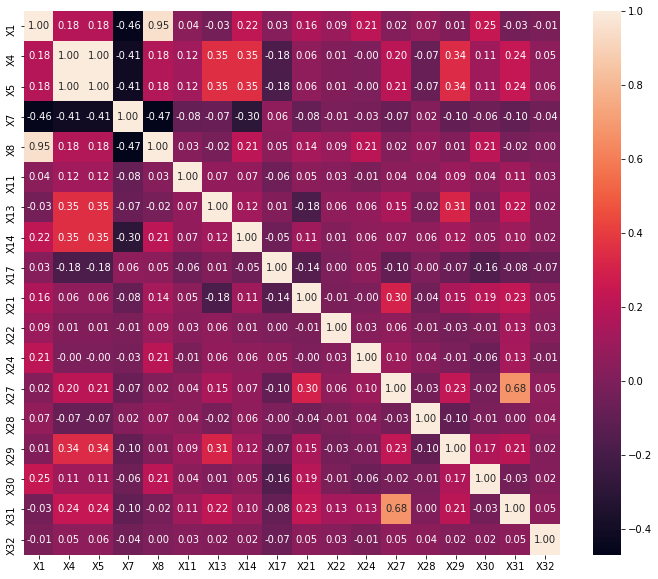

In [30]:
f,ax = plt.subplots(figsize=(12,10))
corr=df_reduced.corr()
sns.heatmap(corr,annot=True,fmt='.2f')

In [31]:
df_reduced=df_reduced.drop(['X5'],axis=1)

In [32]:
df_reduced

,X1,X4,X7,X8,X11,X13,X14,X17,X21,X22,X24,X27,X28,X29,X30,X31,X32
0,11.89,25000.0,1.0,2.0,0.0,85000.0,1.0,1.0,19.48,0.0,0.0,10.0,0.0,28854.0,2.0,42.0,0.0
1,10.71,7000.0,1.0,2.0,0.0,65000.0,0.0,2.0,14.29,0.0,0.0,7.0,0.0,33623.0,2.0,7.0,0.0
2,16.99,25000.0,1.0,4.0,1.0,70000.0,1.0,1.0,10.50,0.0,0.0,10.0,0.0,19878.0,2.0,17.0,0.0
3,13.11,1200.0,1.0,3.0,10.0,54000.0,0.0,1.0,5.47,0.0,0.0,5.0,0.0,2584.0,2.0,31.0,0.0
4,13.57,10800.0,1.0,3.0,6.0,32000.0,0.0,1.0,11.63,0.0,1.0,14.0,0.0,3511.0,1.0,40.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,12.99,10000.0,0.0,3.0,8.0,50000.0,1.0,2.0,21.51,0.0,0.0,9.0,0.0,10268.0,2.0,20.0,1.0
399996,16.29,13150.0,1.0,4.0,1.0,30000.0,1.0,1.0,29.76,0.0,0.0,11.0,0.0,8931.0,2.0,21.0,0.0
399997,10.99,20000.0,0.0,2.0,1.0,99000.0,1.0,2.0,24.13,0.0,0.0,14.0,0.0,28976.0,2.0,48.0,1.0
399998,17.57,18475.0,0.0,4.0,10.0,42000.0,1.0,1.0,31.43,0.0,0.0,19.0,0.0,11982.0,2.0,31.0,0.0


Data Cleaning/Prepping - Test Data

In [35]:
df_test = pd.read_csv('C:/Users/UL494YB/OneDrive - EY/Desktop/Grad School/Data Mining Principle/session 5/Assignment 3/Assignment_3/Loan_Prediction/Holdout for Testing.csv')
df_test.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32
0,NaN,44409194,47416907,"$6,000","$6,000","$6,000",36 months,C,C5,Electrician,...,2-Nov,1,26.0,NaN,18,0,19861,64.50%,33,f
1,NaN,44017917,47034722,"$24,000","$24,000","$24,000",36 months,A,A1,Executive Assistant,...,Dec-68,1,NaN,NaN,12,0,17001,26.20%,36,w
2,NaN,44259158,47306871,"$35,000","$35,000","$35,000",36 months,C,C2,District Sales Leader,...,Oct-98,0,NaN,NaN,16,0,25797,49.90%,33,w
3,NaN,44429213,47476932,"$10,000","$10,000","$10,000",60 months,D,D1,pharmacy associate,...,Feb-99,1,NaN,114.0,13,1,9586,43.80%,21,w
4,NaN,44299188,47346901,"$24,000","$24,000","$24,000",60 months,B,B1,Medical case manager,...,2-Dec,0,48.0,NaN,27,0,31842,41.30%,43,w


In [36]:
df_test=df_test[['X4','X7','X8','X11',
        'X13', 'X14','X17', 'X21',
       'X22','X24', 'X27', 'X28', 'X29', 'X30', 'X31',
       'X32']]
print(df_test.head(5))
print(df_test.shape)
df_test.isnull().sum()

        X4          X7 X8        X11       X13                       X14  \
0   $6,000   36 months  C  10+ years   68000.0         VERIFIED - income   
1  $24,000   36 months  A    8 years  110480.0         VERIFIED - income   
2  $35,000   36 months  C  10+ years   86000.0         VERIFIED - income   
3  $10,000   60 months  D  10+ years   30000.0  VERIFIED - income source   
4  $24,000   60 months  B  10+ years   82500.0         VERIFIED - income   

                  X17    X21  X22  X24  X27  X28    X29     X30  X31 X32  
0  debt_consolidation  28.31    0    1   18    0  19861  64.50%   33   f  
1  debt_consolidation  16.03    0    1   12    0  17001  26.20%   36   w  
2  debt_consolidation  32.49    0    0   16    0  25797  49.90%   33   w  
3  debt_consolidation  32.96    0    1   13    1   9586  43.80%   21   w  
4  debt_consolidation  31.03    0    0   27    0  31842  41.30%   43   w  
(80000, 16)


X4        0
X7        0
X8        0
X11    4382
X13       0
X14       0
X17       0
X21       0
X22       0
X24       0
X27       0
X28       0
X29       0
X30      30
X31       0
X32       0
dtype: int64

In [37]:
df_test['X4']=df_test['X4'].replace({'\$':''}, regex = True)
df_test['X4']=df_test['X4'].replace({',':''}, regex = True)
df_test['X4']=df_test['X4'].astype(float)

In [38]:
df_test['X7']=df_test['X7'].str.slice(1,3)

In [39]:
d2 = {'36': 1, '60': 0}
df_test['X7']=df_test['X7'].map(d2)

In [40]:
d1 = {'A': 1, 'B': 2,'C':3, 'D': 4, 'E': 5,'F':6,'G':7}
df_test['X8']=df_test['X8'].map(d1)

In [41]:
df_test['X11'] = df_test['X11'].str.split(expand=True)[0]
df_test.replace({'X11': '<'}, 0, inplace=True)
df_test.replace({'X11': '10+'}, 10, inplace=True)

In [42]:
d = {'VERIFIED - income': 1, 'VERIFIED - income source': 1,'not verified':0}
df_test['X14']=df_test['X14'].map(d)

In [43]:
df_test['X17']=df_test['X17'].map(temp)

In [44]:
df_test['X30']=df_test['X30'].replace({'%':''}, regex = True)
df_test['X30']=df_test['X30'].astype(float)

In [45]:
df_test['X30']=df_test['X30'].mask(df_test['X30']<=30.,1)
df_test['X30']=df_test['X30'].mask(df_test['X30']>30,2)
df_test['X30']=df_test['X30'].mask(df_test['X30']>50,3)

In [46]:
d2 = {'w': 1, 'f': 0}
df_test['X32']=df_test['X32'].map(d2)

In [47]:
df_test.isnull().sum()

X4        0
X7        0
X8        0
X11    4382
X13       0
X14       0
X17       0
X21       0
X22       0
X24       0
X27       0
X28       0
X29       0
X30      30
X31       0
X32       0
dtype: int64

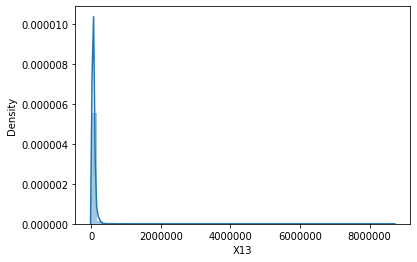

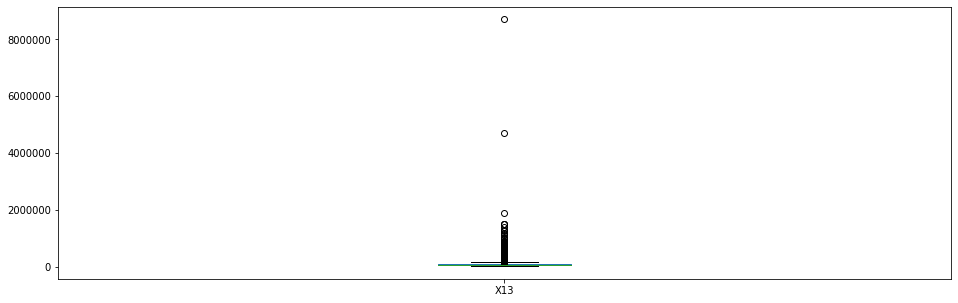

In [48]:
#Outliner Treatment for X11 and X13
sns.distplot(df_test['X13'])
plt.show()
df_test['X13'].plot.box(figsize=(16,5))
plt.show()

In [49]:
df_test['X13_New']=np.log(df_test['X13'])
df_test.drop('X13',1,inplace=True)

In [50]:
df_test['X30'].fillna(df_test['X30'].mean(),inplace=True)

In [51]:
print(df_test['X11'].value_counts())

10    26723
2      7220
0      6459
3      6441
1      5094
4      4603
5      4583
7      3978
8      3970
6      3385
9      3162
Name: X11, dtype: int64


In [52]:
dt=df_test['X11'].dropna()
dt=dt.astype(float)
print(dt.mode())
dt.mean()

0    10.0
dtype: float64


6.027506678304108

In [53]:
df_test['X11'].fillna(dt.mean(),inplace=True)

In [54]:
df_test.dtypes

X4         float64
X7           int64
X8           int64
X11         object
X14          int64
X17          int64
X21        float64
X22          int64
X24          int64
X27          int64
X28          int64
X29          int64
X30        float64
X31          int64
X32          int64
X13_New    float64
dtype: object

In [55]:
cols = ['X4', 'X7', 'X8', 'X11', 'X14', 'X17', 'X21', 'X22', 'X24',
       'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X13_New']
df_test[cols] = df_test[cols].applymap(np.float64)

In [56]:
df_test.isnull().sum()

X4         0
X7         0
X8         0
X11        0
X14        0
X17        0
X21        0
X22        0
X24        0
X27        0
X28        0
X29        0
X30        0
X31        0
X32        0
X13_New    0
dtype: int64

In [57]:
df_test.shape

(80000, 16)

Modeling

Fitting data into the following models:

1. Linear Regression
2. Lasso
3. Ridge
4. Decision Tree
5. Pipelining
6. Random Forest

In [58]:
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import statsmodels.api as sm 
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
import random
import warnings
warnings.simplefilter(action='ignore')

%matplotlib inline

In [59]:
X = df_reduced.drop('X1',1)
y = df_reduced['X1']
#create x and y variables

In [60]:
p = PolynomialFeatures()
features_poly = p.fit_transform(X)
poly_df = pd.DataFrame(features_poly, columns=p.get_feature_names())
#creating a data frame of the fit/transformed features

In [61]:
features_poly_test = p.transform(df_test)
poly_df_test = pd.DataFrame(features_poly_test, columns=p.get_feature_names())

In [62]:
X_train, X_test, y_train, y_test = train_test_split(poly_df, y, random_state=28)

In [63]:
ss = StandardScaler()
ss.fit(X_train)
X_train_sc = ss.transform(X_train)
X_test_sc = ss.transform(X_test)

In [64]:
scaled_test_data = ss.transform(poly_df_test)
#scaling the test data and setting it equal to a variable, scaled_test_data

In [65]:
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)
print(X_train.shape)
X_test.shape

(182349, 153)


(60784, 153)

Linear Regression

In [66]:
lr = LinearRegression()

In [67]:
print(lr.fit(X_train_sc, y_train_log))
#fitting my training data to the linear regression model
print(lr.score(X_train_sc, y_train_log))
#scoring my training data
lr.score(X_test_sc, y_test_log)
#scoring my testing data r squared

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
0.9089135982282434


0.9058428104565669

Ridge

In [68]:
ridge = RidgeCV()

In [69]:
print(ridge.fit(X_train_sc, y_train_log))
#fitting my training data to the ridge model
print(ridge.score(X_train_sc, y_train_log))
#scoring my training data
ridge.score(X_test_sc, y_test_log)
#scoring my testing data r squared

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=None, fit_intercept=True,
        gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)
0.9089135120267756


0.9058398456676221

Lasso

In [70]:
lasso = LassoCV()

In [71]:
print(lasso.fit(X_train_sc, y_train_log))
#fitting my training data to the lasso model
print(lasso.score(X_train_sc, y_train_log))
#scoring my training data
lasso.score(X_test_sc, y_test_log)
#scoring my testing data r squared

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)
0.9079397157976701


0.9072023036632444

In [72]:
y_pred = lasso.predict(scaled_test_data)
#creating a variable, y_pred, and setting it equal to the lasso prediction of my scaled test data

In [73]:
y_pred_1 = np.exp(y_pred)
y_pred_2 = np.exp(y_pred_1)

Decision Tree and Cross Validation Check

In [75]:
# Import DecisionTreeRegressor from sklearn.tree
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

import sklearn.model_selection as cv
from sklearn.tree import DecisionTreeRegressor
(X_train1, X_test1, y_train1, y_test1) = cv.train_test_split(X, y, test_size=.30)

In [76]:
ss = StandardScaler()
ss.fit(X_train1)
X_train_sc1 = ss.transform(X_train1)
X_test_sc1 = ss.transform(X_test1)

In [77]:
# Instantiate dt
dt = DecisionTreeRegressor(max_depth=8,
                           min_samples_leaf=0.13,
                           random_state=3)

# Fit to the training set
dt.fit(X_train_sc1, y_train1)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=8,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=0.13, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=3, splitter='best')

In [78]:
from sklearn.metrics import mean_squared_error as MSE

# Compute y_pred
y_pred = dt.predict(X_test_sc1)

# Compute mse_dt
mse_dt = MSE(y_test1, y_pred)

# Compute rmse_dt
rmse_dt = mse_dt**(1/2)

# Print rmse_dt
print("Test set RMSE of dt: {:.2f}".format(rmse_dt))

Test set RMSE of dt: 1.69


In [79]:
from sklearn.model_selection import cross_val_score
# Compute the array containing the 10-folds CV MSEs
MSE_CV_scores = - cross_val_score(dt, X_train_sc1, y_train1, cv=10, 
                                  scoring='neg_mean_squared_error', 
                                  n_jobs=-1) 

# Compute the 10-folds CV RMSE
RMSE_CV = (MSE_CV_scores.mean())**(1/2)

# Print RMSE_CV
print('CV RMSE: {:.2f}'.format(RMSE_CV))

CV RMSE: 1.69


In [80]:
# Import mean_squared_error from sklearn.metrics as MSE
from sklearn.metrics import mean_squared_error as MSE

# Fit dt to the training set
dt.fit(X_train_sc1, y_train1)

# Predict the labels of the training set
y_pred_train = dt.predict(X_train_sc1)

# Evaluate the training set RMSE of dt
RMSE_train = (MSE(y_train1, y_pred_train))**(1/2)

# Print RMSE_train
print('Train RMSE: {:.2f}'.format(RMSE_train))

Train RMSE: 1.69


In [81]:
print(dt.score(X_train_sc1, y_train1))
print(dt.score(X_test_sc1, y_test1))

0.8516562913426107
0.8509554629645508


In [82]:
ss_test = ss.transform(df_test)
y_pred = dt.predict(ss_test)

Pipelining -Combining GridSearchCV and Ridge Regression Model

In [83]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

In [84]:
param={"step2__alpha":[0.01,0.1,1,10,100]}

In [85]:
from sklearn.model_selection import GridSearchCV
pipe2=Pipeline([('step1',StandardScaler()),('step2',Ridge())])
grid=GridSearchCV(pipe2,param_grid=param,cv=5)
grid.fit(X_train,y_train)
print("Best cv accuracy : ",grid.best_score_)
print("Best parameter : ",grid.best_params_)
print("Train score : ",grid.score(X_train,y_train))
print("Test score : ",grid.score(X_test,y_test))

Best cv accuracy :  0.9217245628635766
Best parameter :  {'step2__alpha': 1}
Train score :  0.92195996018205
Test score :  0.9188892332289508


Random Forest Regressor

In [86]:
# Basic imports
from sklearn import preprocessing, metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)
import statsmodels.api as sm
from scipy import stats

In [87]:
(X_train1, X_test1, y_train1, y_test1) = cv.train_test_split(X, y, test_size=.20)

In [88]:
ss = StandardScaler()
ss.fit(X_train1)
X_train_sc1 = ss.transform(X_train1)
X_test_sc1 = ss.transform(X_test1)

In [89]:
# Instantiate a random forests regressor 'rf'400 estimators
regrRM = RandomForestRegressor(n_estimators=400, max_depth = 50, min_samples_split = 5,min_samples_leaf =2)
regrRM.fit(X_train_sc1, y_train1)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=50, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=400, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [90]:
print(regrRM.score(X_train_sc1, y_train1))
print(regrRM.score(X_test_sc1, y_test1))
y_pred1= regrRM.predict(X_test_sc1)
print(np.sqrt(metrics.mean_squared_error(y_test1,y_pred1)))

0.9826682394921792
0.9244680669347055
1.2090277874262103


In [91]:
regrRM.feature_importances_

array([9.17654722e-03, 1.32632498e-03, 9.27306429e-01, 4.74019636e-03,
       9.40841723e-03, 1.22540532e-03, 2.72925619e-03, 1.18042170e-02,
       1.22652281e-03, 2.12972977e-03, 6.11540659e-03, 8.31074039e-04,
       1.19013045e-02, 1.15650983e-03, 7.63997117e-03, 1.28268797e-03])

In [92]:
CoeffRM1 = pd.DataFrame(columns=["Variable","FeatureImportance"])
CoeffRM1["Variable"]=X_train1.columns
CoeffRM1["FeatureImportance"]=regrRM.feature_importances_
CoeffRM1.sort_values("FeatureImportance", ascending = False)

,Variable,FeatureImportance
2,X8,0.927306
12,X29,0.011901
7,X21,0.011804
4,X13,0.009408
0,X4,0.009177
14,X31,0.007640
10,X27,0.006115
3,X11,0.004740
6,X17,0.002729
9,X24,0.002130


In [93]:
# Predict the test set labels 'y_pred'
y_pred_train=regrRM.predict(X_train_sc1)
# Evaluate the test set RMSE
rmse_test = MSE(y_test1, y_pred1)**(1/2)
rmse_train = MSE(y_train1, y_pred_train)**(1/2)
# Print the test set RMSE
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))
print('Train set RMSE of rf: {:.2f}'.format(rmse_train))

Test set RMSE of rf: 1.21
Train set RMSE of rf: 0.58


Try without Standardize

In [94]:
(X_train2, X_test2, y_train2, y_test2) = cv.train_test_split(X, y, test_size=.20)

In [95]:
regrRM = RandomForestRegressor(n_estimators=400, min_samples_leaf=0.1)
regrRM.fit(X_train2, y_train2)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=0.1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=400, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [96]:
# Predict the test set labels 'y_pred'
y_pred2= regrRM.predict(X_test2)
y_pred_train2=regrRM.predict(X_train2)
# Evaluate the test set RMSE
rmse_test = MSE(y_test2, y_pred2)**(1/2)
rmse_train = MSE(y_train1, y_pred_train2)**(1/2)
# Print the test set RMSE
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))
print('Train set RMSE of rf: {:.2f}'.format(rmse_train))

Test set RMSE of rf: 1.74
Train set RMSE of rf: 5.87


I ran 6 models for the loan predictions

Linear Regression: this model returned the r-squarted of 0.90

Lasso: this model also returned the r-squared of 0.90

Ridge: Ridge model returned a similar r-squared of.90 comparing to linear regression model and lasso model

Decision Tree: I performed the a comparsion between CV error, train error, and test error, and determined my current model is performing well as all three errors are very close (at 1.69). This model returned the r-squared of 0.85.

Pipelining: I combined GridSearchCV and ridge regression model in my pipelining. This model returned the r-squared of 0.92.

Random Forest Regressor: Out of all my models, the random forest regresor performed the worst due to a problem of overfitting. In order to mitigate overfitting, I set max depth to 50, the default value to 2, and min_samples_leaf to 2. But I was not able to get test RMSE and train RMSE closer. As a result, I will not use Random Forest Regrssor model to predict the loan rate.

I printed out loan prediction results using Lasso (final submission) and Decision Tree methonds ( final submission 2) and validated their similarities. I will use descision tree result as my final submission as I performed my cross validation and is confident with my result.